# Exercices de TP 06: Transfert Learning avec VGG-16
## . Objectif :
Dans ce TP, vous allez apprendre à :
1. Implémenter l'architecture VGG-16.
2. Entraîner VGG-16 sur un petit ensemble de données d'images.
3. Appliquer le Transfert Learning avec un modèle pré-entraîné sur ImageNet.
4. Fine-tuner certaines couches de VGG-16 pour améliorer les performances.

# Exercice 1 :  Implémentez VGG-16
## Architecture de VGG-16
Avant de vous lancer dans l'implémentation d'un réseau de neurones, vous devez impérativement comprendre son architecture dans les moindres détails ! Nous allons donc passer un peu de temps à étudier la configuration des différentes couches de VGG-16.

- VGG-16 est constitué de plusieurs couches, dont 13 couches de convolution et 3 fully-connected. Il doit donc apprendre les poids de 16 couches. Il prend en entrée une image en couleurs de taille 224  ×
 224 px et la classifie dans une des 1000 classes. Il renvoie donc un vecteur de taille 1000, qui contient les probabilités d'appartenance à chacune des classes.

L'architecture de VGG-16 est illustrée par les schémas ci-dessous :
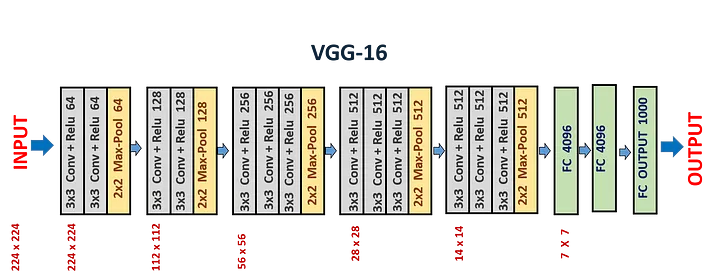



In [ ]:
from tensorflow.keras import layers, models

def build_vgg16(input_shape=(224, 224, 3), num_classes=2):
    model = models.Sequential()

    # Bloc 1


    # Bloc 2


    # Bloc 3


    # Bloc 4


    # Bloc 5


    # Fully connected layers
    model.add(layers.Flatten())
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

In [ ]:
model = build_vgg16()
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 134,268,738 (512.19 MB)

 Trainable params: 134,268,738 (512.19 MB)

 Non-trainable params: 0 (0.00 B)

# Exercice 2 : Utilisation du VGG-16 pré-entraîné
Vous savez maintenant comment implémenter un réseau de neurones convolutif de A à Z avec Keras. Dans cette partie, nous allons apprendre à classifier des images avec le modèle VGG-16 fourni par Keras et pré-entraîné sur ImageNet.
- La première étape consiste à charger ce modèle avec la classe VGG16 de  "**keras.applications.vgg16**" :

In [ ]:
from keras.applications.vgg16 import VGG16

model = VGG16() # Création du modèle VGG-16 implementé par Keras

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step


. Par défaut, le constructeur  VGG16()  crée le réseau VGG-16 pré-entraîné sur ImageNet. Si à l'avenir, pour d'autres projets, vous souhaitez initialiser aléatoirement les poids, il faudra préciser  **weights=None**  en argument.

. Le constructeur possède d'autres paramètres pour faire du Transfer Learning, que nous allons utiliser dans la partie suivante.

. Nous allons utiliser ce réseau pré-entraîné pour classer une image dans une des 1000 catégories d'ImageNet.

. Nous devons d'abord charger l'image et la pré-traiter afin qu'elle respecte bien les spécifications des images en entrée de VGG-16. Pour cela, nous allons utiliser les fonctions du module  keras.preprocessing.image  et  keras.preprocessing.vgg16  :

1.  VGG-16 reçoit des images de taille **(224, 224, 3)** : la fonction  load_img  permet de charger l'image et de la redimensionner correctement

2. Keras traite les images comme des tableaux numpy :  img_to_array  permet de convertir l'image chargée en tableau numpy

3. Le réseau doit recevoir en entrée une collection d'images, stockée dans un tableau de 4 dimensions, où les dimensions correspondent (dans l'ordre) à (nombre d'images, largeur, hauteur, profondeur). Pour l'instant, nous donnons qu'une image en entrée : numpy.reshape  permet d'ajouter la première dimension (nombre d'images = 1) à notre image.

4. Enfin,  preprocess_input  permet d'appliquer les mêmes pré-traitements que ceux utilisés sur l'ensemble d'apprentissage lors du pré-entraînement.

Ainsi, on prépare l'image comme ci-dessous :

In [ ]:
from keras.preprocessing.image import load_img, img_to_array

from keras.applications.vgg16 import preprocess_input
img = load_img('cat.jpeg', target_size=(224, 224))  # Charger l'image

img = img_to_array(img)  # Convertir en tableau numpy

img = img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))  # Créer la collection d'images (un seul échantillon)

img = preprocess_input(img)  # Prétraiter l'image comme le veut VGG-16

Nous pouvons maintenant donner l'image en entrée du réseau et prédire sa classe :

In [ ]:
y = model.predict(img)  # Prédir la classe de l'image (parmi les 1000 classes d'ImageNet)

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


On obtient la sortie finale du réseau, c'est-à-dire une liste de 1000 probabilités.

Les classes correspondant à ces probabilités ne sont pas explicitement données. La fonction  decode_predictions  de  keras.applications.vgg16  permet alors de récupérer cette information.  Ainsi, on peut faire un top 3 des classes les plus probables de l'image :

In [ ]:
from keras.applications.vgg16 import decode_predictions

# Afficher les 3 classes les plus probables
print('Top 3 :', decode_predictions(y, top=3)[0])

35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Top 3 : [('n02124075', 'Egyptian_cat', 0.52229303), ('n02123045', 'tabby', 0.27206746), ('n02123159', 'tiger_cat', 0.045546886)]


# Exercice 3 :

Dans l'exercice précédent, nous avons utilisé le réseau VGG-16 fourni par Keras pour résoudre le même problème de classification que celui sur lequel il a été pré-entraîné (classification à 1000 classes avec ImageNet). En pratique, vous serez très probablement confrontés à un nouveau problème de classification. Dans ce cas, savoir mettre en oeuvre le Transfer Learning vous sera très utile !

Je vous encourage tout d'abord à bien vous remettre en tête les stratégies possibles, introduites dans le cours : fine-tuning total, extraction des features, et fine-tuning partiel.

Dans les trois cas, il faut remplacer les dernières couches fully-connected qui permettent de classifier l'image dans une des 1000 classes ImageNet) par un classifieur plus adapté à notre problème.  Par exemple, supposons qu'on veuille différencier un chat d'un chien **(classification binaire)**. La suppression des dernières couches se fait en ajoutant l'argument  include_top = False  lors de l'import du modèle pré-entraîné. Dans ce cas, il faut aussi préciser les dimensions des images en entrée **(input_shape )** :

## Étape 1 : Téléchargement des données Cats vs Dogs
Nous utiliserons l'API tensorflow_datasets pour télécharger et prétraiter les données.

In [ ]:
import tensorflow_datasets as tfds
import tensorflow as tf

# Charger le dataset "Cats vs Dogs"
(ds_train, ds_val), ds_info = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:]'],  # 80% pour entraînement, 20% pour validation
    as_supervised=True,  # Inclut les paires (image, label)
    with_info=True
)

# Fonction de prétraitement des images
def preprocess_image(image, label):
    image = tf.image.resize(image, (224, 224))  # Redimensionner à 224x224 pour VGG-16
    image = tf.cast(image, tf.float32) / 255.0  # Normaliser entre 0 et 1
    return image, label

# Appliquer le prétraitement
ds_train = ds_train.map(preprocess_image).batch(32).prefetch(buffer_size=tf.data.AUTOTUNE)
ds_val = ds_val.map(preprocess_image).batch(32).prefetch(buffer_size=tf.data.AUTOTUNE)


In [ ]:
ds_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

## Étape 2 : Construire l'architecture VGG-16
Vous pouvez construire l'architecture VGG-16 ou la charger à partir de TensorFlow. Voici comment la charger et ajouter une couche de sortie adaptée au problème.

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D

# Charger le modèle VGG-16 pré-entraîné sur ImageNet, sans la tête de classification
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Ajouter une nouvelle tête de classification
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Remplace Flatten pour une meilleure généralisation
x = Dense(256, activation='relu')(x)
x = Dense(1, activation='sigmoid')(x)  # 1 sortie pour classification binaire (chat ou chien)

model = Model(inputs=base_model.input, outputs=x)

# Résumé du modèle
model.summary()


Model: "functional_67"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 256)                 │         131,3

 Total params: 14,846,273 (56.63 MB)

 Trainable params: 14,846,273 (56.63 MB)

 Non-trainable params: 0 (0.00 B)

# Étape 3: Appliquer l'une des Trois stratégies
# Stratégie 1 : fine-tuning total
Ici, on entraîne tout le réseau, donc il faut rendre toutes les couches "entraînables" :

In [ ]:
for layer in model.layers:
   layer.trainable = True
# Compiler le modèle
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',  # Perte binaire
    metrics=['accuracy']
)

# Entraîner le modèle
history = model.fit(
    ds_train,
    validation_data=ds_val,
    epochs=20,
    verbose=1
)


#Stratégie 2 : extraction de features
On entraîne seulement le nouveau classifieur et on ne ré-entraîne pas les autres couches :

In [ ]:
# Geler les couches convolutives du modèle de base
for layer in base_model.layers:
    layer.trainable = False

# Compiler le modèle
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',  # Perte binaire
    metrics=['accuracy']
)

# Entraîner le modèle
history = model.fit(
    ds_train,
    validation_data=ds_val,
    epochs=20,
    verbose=1
)


Epoch 1/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 124s 186ms/step - accuracy: 0.8395 - loss: 0.3637 - val_accuracy: 0.8964 - val_loss: 0.2288
Epoch 2/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 113s 161ms/step - accuracy: 0.9154 - loss: 0.1996 - val_accuracy: 0.9033 - val_loss: 0.2200
Epoch 3/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 139s 156ms/step - accuracy: 0.9216 - loss: 0.1846 - val_accuracy: 0.9050 - val_loss: 0.2167
Epoch 4/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 91s 156ms/step - accuracy: 0.9249 - loss: 0.1772 - val_accuracy: 0.9082 - val_loss: 0.2123
Epoch 5/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 90s 155ms/step - accuracy: 0.9244 - loss: 0.1730 - val_accuracy: 0.9129 - val_loss: 0.2005
Epoch 6/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 90s 155ms/step - accuracy: 0.9269 - loss: 0.1686 - val_accuracy: 0.9187 - val_loss: 0.1880
Epoch 7/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 91s 156ms/step - accuracy: 0.9289 - loss: 0.1643 - val_accuracy: 0.9248 - val_loss: 0.1761
Epoch 8/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 93s 160ms/step - accuracy: 0.9295 - loss

#Stratégie 3 : fine-tuning partiel
On entraîne le nouveau classifieur et les couches hautes :

In [ ]:
# Ne pas entraîner les 5 premières couches (les plus basses)
for layer in model.layers[:5]:
   layer.trainable = False

# Recompiler avec un faible taux d'apprentissage
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Réentraîner le modèle
history_finetune = model.fit(
    ds_train,
    validation_data=ds_val,
    epochs=5,
    verbose=1
)


## Étape 5 : Évaluer le modèle
Une fois le modèle entraîné, évaluez ses performances sur l'ensemble de validation.

In [ ]:
# Évaluer sur l'ensemble de validation
val_loss, val_accuracy = model.evaluate(ds_val, verbose=1)
print(f"Loss: {val_loss}, Accuracy: {val_accuracy}")
